# Week Three Project Three

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading the Data 

In [2]:
data = pd.concat(map(pd.read_csv,["fitbit_export_20230119 (1).csv","fitbit_export_20230119 (2).csv","fitbit_export_20230119 (3).csv","fitbit_export_20230119 (4).csv","fitbit_export_20230119 (5).csv","fitbit_export_20230119 (6).csv","fitbit_export_20230119 (7).csv","fitbit_export_20230119 (8).csv","fitbit_export_20230119 (9).csv","fitbit_export_20230119 (10).csv","fitbit_export_20230119 (11).csv","fitbit_export_20230119 (12).csv" ]),ignore_index=True)

### Analysing  the Data

In [3]:
data.shape

(365, 10)

In [4]:
data.isnull().sum()

Date                      0
Calories Burned           0
Steps                     0
Distance                  0
Floors                    0
Minutes Sedentary         0
Minutes Lightly Active    0
Minutes Fairly Active     0
Minutes Very Active       0
Activity Calories         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    365 non-null    object 
 1   Calories Burned         365 non-null    object 
 2   Steps                   365 non-null    object 
 3   Distance                365 non-null    float64
 4   Floors                  365 non-null    int64  
 5   Minutes Sedentary       365 non-null    object 
 6   Minutes Lightly Active  365 non-null    int64  
 7   Minutes Fairly Active   365 non-null    int64  
 8   Minutes Very Active     365 non-null    int64  
 9   Activity Calories       365 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 28.6+ KB


In [6]:
data_new = data.replace('[^\d.]','',regex=True)

### Converting Datatype to Integer

In [7]:
data_new['Calories Burned'] = data_new['Calories Burned'].astype('int64')

In [8]:
data_new['Distance'] = data_new['Distance'].astype('int64')

In [9]:
data_new['Steps'] = data_new['Steps'].astype('int64')

In [10]:
data_new['Activity Calories'] = data_new['Activity Calories'].astype('int64')

In [11]:
data_new['Minutes Sedentary'] = data_new['Minutes Sedentary'].astype('int64')

In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    365 non-null    object
 1   Calories Burned         365 non-null    int64 
 2   Steps                   365 non-null    int64 
 3   Distance                365 non-null    int64 
 4   Floors                  365 non-null    int64 
 5   Minutes Sedentary       365 non-null    int64 
 6   Minutes Lightly Active  365 non-null    int64 
 7   Minutes Fairly Active   365 non-null    int64 
 8   Minutes Very Active     365 non-null    int64 
 9   Activity Calories       365 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 28.6+ KB


In [13]:
data_new['Total Activity'] = data_new.iloc[:,6:9].sum(axis=1)

### Finding Relationship using Matplotlib

In [14]:
import matplotlib.pyplot as plt

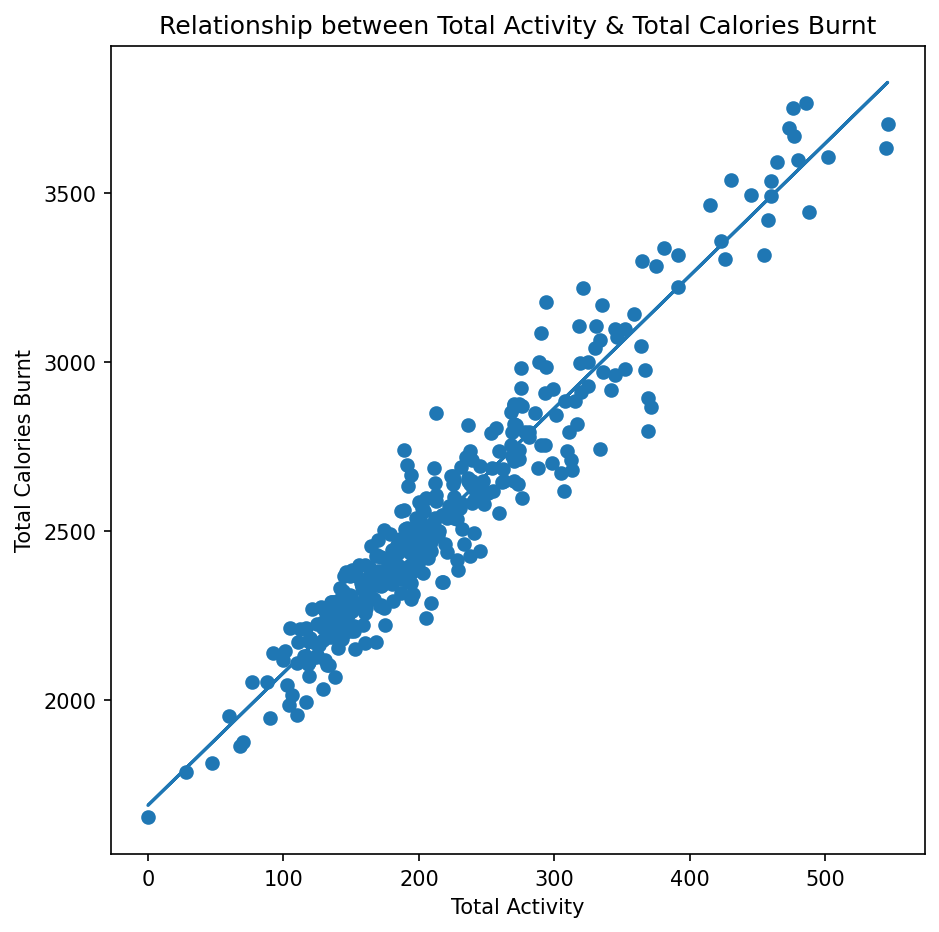

In [15]:
plt.figure(figsize=(7,7), dpi=150)
x=data_new['Total Activity']
y=data_new['Calories Burned']
plt.scatter(x,y)
plt.xlabel("Total Activity")
plt.ylabel("Total Calories Burnt")
plt.title("Relationship between Total Activity & Total Calories Burnt")

z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x, p(x))


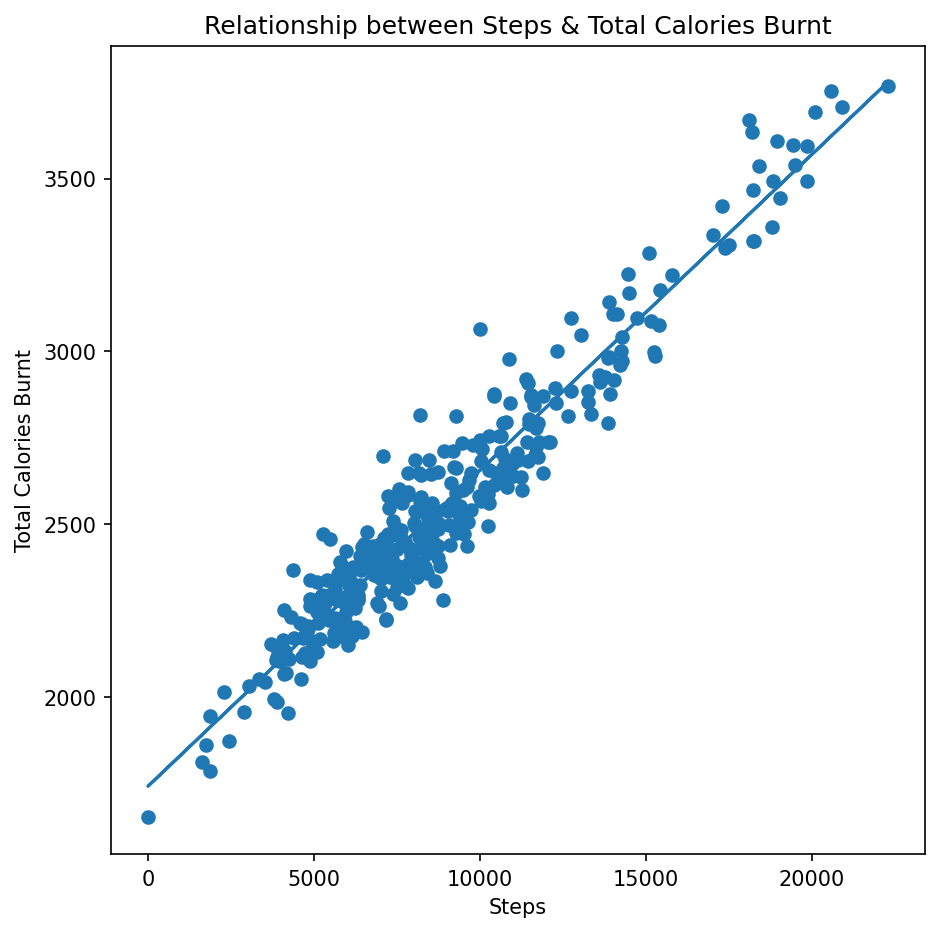

In [16]:
plt.figure(figsize=(7,7), dpi=150)
x=data_new['Steps']
y=data_new['Calories Burned']
plt.scatter(x,y)
plt.xlabel("Steps")
plt.ylabel("Total Calories Burnt")
plt.title("Relationship between Steps & Total Calories Burnt")

z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x, p(x))

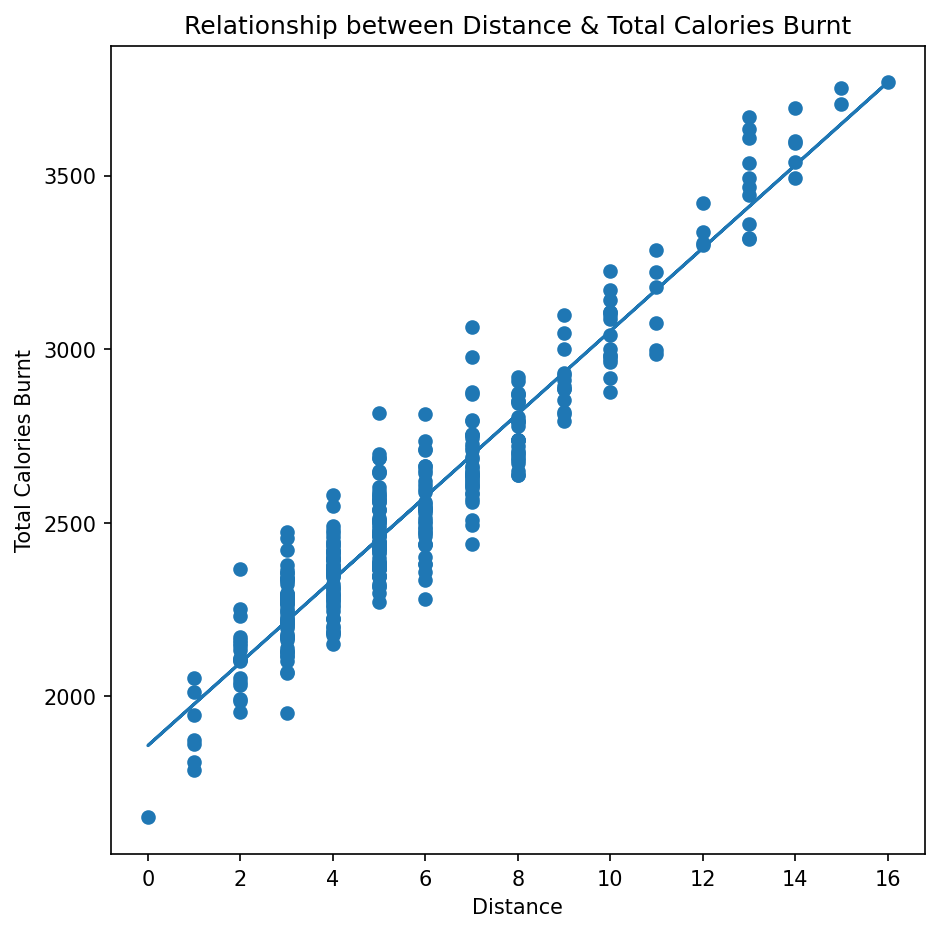

In [17]:
plt.figure(figsize=(7,7), dpi=150)
x=data_new['Distance']
y=data_new['Calories Burned']
plt.scatter(x,y)
plt.xlabel("Distance")
plt.ylabel("Total Calories Burnt")
plt.title("Relationship between Distance & Total Calories Burnt")

z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x, p(x))

In [18]:
x=np.array(data_new[['Steps','Total Activity','Distance']])
y=np.array(data_new['Calories Burned'])
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2,random_state=42)


model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9654450170091105

In [19]:
print("Calorie Prediction")
a=int(input("Steps Taken: "))
b=int(input("Active Minutes: "))
c=float(input("Distacne: "))

features = np.array([[a, b,c]])
print("Calorie Burned = ",model.predict(features))

Calorie Prediction
Steps Taken: 6000
Active Minutes: 153
Distacne: 4
Calorie Burned =  [2274.85263402]
